# Horse Racing Prediction Model - Junior Quant Test

## Table of Contents
- [Q0: Data Exploration](#q0)
- [Q1: Peak Age Analysis](#q1)
- [Q2: Rating Systems](#q2)
- [Q3: Predictive Model](#q3)
- [Q4: Market Comparison](#q4)
- [Summary](#summary)

---

In [33]:
# Cell 1: Title and Introduction
"""
# Horse Racing Prediction Model
## Junior Quant Test Submission

**Name:** Vindya
**Date:** November 2024

### Project Overview
This analysis builds a predictive model for horse racing outcomes using 
historical performance data, custom rating systems, and machine learning techniques.
"""

# Cell 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

# Cell 3: Load Data
# Load the dataset
df = pd.read_csv('test_dataset.csv')

print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
df.head()

Dataset shape: (777549, 30)
Date range: 2015-05-01 to 2022-04-30


,date,racecourse_country,racecourse_name,race_time,race_id,race_distance,race_type,race_type_simple,going_clean,n_runners,horse_id,horse_name,age,official_rating,carried_weight,draw,jockey_id,jockey_name,trainer_id,trainer_name,ltp_5min,obs__bsp,obs__racing_post_rating,obs__Place,obs__uposition,obs__is_winner,obs__top_speed,obs__distance_to_winner,obs__pos_prize,obs__completion_time
0,2015-05-01,GB,Chepstow,13:40,49699,2435.0472,Flat,Flat Turf,Good,8,21374,Eton Rambler,5,73.0,59.874193,3,5362,Pat Cosgrave,375,George Baker,7.8,9.12,82.0,3,3,0,48.0,2.5,721.50,155.95
1,2015-05-01,GB,Chepstow,13:40,49699,2435.0472,Flat,Flat Turf,Good,8,21378,Shades Of Silver,5,69.0,58.059823,6,7227,William Twiston-Davies,367,Michael Scudamore,5.8,7.00,81.0,2,2,0,47.0,0.5,1443.75,155.61
2,2015-05-01,GB,Chepstow,13:40,49699,2435.0472,Flat,Flat Turf,Good,8,26461,Marengo,4,69.0,54.884677,8,12949,Jordan Williams,762,Bernard Llewellyn,12.0,9.28,45.0,8,8,0,11.0,23.0,0.00,159.36
3,2015-05-01,GB,Chepstow,13:40,49699,2435.0472,Flat,Flat Turf,Good,8,50069,Smoker,5,70.0,58.513416,2,5425,Oisin Murphy,126,Tim Vaughan,34.0,18.00,62.0,6,6,0,28.0,13.0,0.00,157.70
4,2015-05-01,GB,Chepstow,13:40,49699,2435.0472,Flat,Flat Turf,Good,8,102542,Symphony Of Kings,4,74.0,60.327785,4,5481,Adam Kirby,414,Tony Carroll,7.6,7.40,77.0,5,5,0,44.0,6.0,0.00,156.53


<a id='q0'></a>
# Q0: Data Exploration

In [27]:
# ============================================
# Q0: EXPLORE THE DATASET
# ============================================

print("="*60)
print("Q0: DATA EXPLORATION")
print("="*60)

# --------------------------------------------
# Step 1: Basic Dataset Information
# --------------------------------------------

print("\n### STEP 1: BASIC INFORMATION ###\n")

# Dataset shape
print(f"Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Date range
print(f"\nDate range: {df['date'].min()} to {df['date'].max()}")

# Number of unique values
print(f"\nUnique races: {df['race_id'].nunique():,}")
print(f"Unique horses: {df['horse_id'].nunique():,}")
print(f"Unique jockeys: {df['jockey_id'].nunique():,}")
print(f"Unique trainers: {df['trainer_id'].nunique():,}")
print(f"Unique racecourses: {df['racecourse_name'].nunique():,}")

# First few rows
print("\n### First 5 rows of the dataset:")
display(df.head())

# Column names and types
print("\n### Column Information:")
print(df.info())

# --------------------------------------------
# Step 2: Summary Statistics
# --------------------------------------------

print("\n### STEP 2: SUMMARY STATISTICS ###\n")

# Numerical columns summary
print("Numerical variables summary:")
display(df.describe())

# Categorical variables
print("\n### Race Type Distribution:")
print(df['race_type_simple'].value_counts())

print("\n### Going Condition Distribution:")
print(df['going_clean'].value_counts())

print("\n### Country Distribution:")
print(df['racecourse_country'].value_counts())


Q0: DATA EXPLORATION

### STEP 1: BASIC INFORMATION ###

Dataset shape: 777,549 rows × 30 columns

Date range: 2015-05-01 00:00:00 to 2022-04-30 00:00:00

Unique races: 81,808
Unique horses: 77,905
Unique jockeys: 2,656
Unique trainers: 2,441
Unique racecourses: 86

### First 5 rows of the dataset:


,date,racecourse_country,racecourse_name,race_time,race_id,race_distance,race_type,race_type_simple,going_clean,n_runners,horse_id,horse_name,age,official_rating,carried_weight,draw,jockey_id,jockey_name,trainer_id,trainer_name,ltp_5min,obs__bsp,obs__racing_post_rating,obs__Place,obs__uposition,obs__is_winner,obs__top_speed,obs__distance_to_winner,obs__pos_prize,obs__completion_time
0,2015-05-01,GB,Chepstow,13:40,49699,2435.0472,Flat,Flat Turf,Good,8,21374,Eton Rambler,5,73.0,59.874193,3,5362,Pat Cosgrave,375,George Baker,7.8,9.12,82.0,3,3,0,48.0,2.5,721.50,155.95
1,2015-05-01,GB,Chepstow,13:40,49699,2435.0472,Flat,Flat Turf,Good,8,21378,Shades Of Silver,5,69.0,58.059823,6,7227,William Twiston-Davies,367,Michael Scudamore,5.8,7.00,81.0,2,2,0,47.0,0.5,1443.75,155.61
2,2015-05-01,GB,Chepstow,13:40,49699,2435.0472,Flat,Flat Turf,Good,8,26461,Marengo,4,69.0,54.884677,8,12949,Jordan Williams,762,Bernard Llewellyn,12.0,9.28,45.0,8,8,0,11.0,23.0,0.00,159.36
3,2015-05-01,GB,Chepstow,13:40,49699,2435.0472,Flat,Flat Turf,Good,8,50069,Smoker,5,70.0,58.513416,2,5425,Oisin Murphy,126,Tim Vaughan,34.0,18.00,62.0,6,6,0,28.0,13.0,0.00,157.70
4,2015-05-01,GB,Chepstow,13:40,49699,2435.0472,Flat,Flat Turf,Good,8,102542,Symphony Of Kings,4,74.0,60.327785,4,5481,Adam Kirby,414,Tony Carroll,7.6,7.40,77.0,5,5,0,44.0,6.0,0.00,156.53



### Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777549 entries, 0 to 777548
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     777549 non-null  datetime64[ns]
 1   racecourse_country       777549 non-null  object        
 2   racecourse_name          777549 non-null  object        
 3   race_time                777549 non-null  object        
 4   race_id                  777549 non-null  int64         
 5   race_distance            777549 non-null  float64       
 6   race_type                777549 non-null  object        
 7   race_type_simple         777549 non-null  object        
 8   going_clean              777549 non-null  object        
 9   n_runners                777549 non-null  int64         
 10  horse_id                 777549 non-null  int64         
 11  horse_name               777549 non-null  object     

,date,race_id,race_distance,n_runners,horse_id,age,official_rating,carried_weight,draw,jockey_id,trainer_id,ltp_5min,obs__bsp,obs__racing_post_rating,obs__uposition,obs__is_winner,obs__top_speed,obs__distance_to_winner,obs__pos_prize,obs__completion_time
count,777549,777549.000000,777549.000000,777549.000000,777549.000000,777549.000000,573933.000000,777549.000000,777549.000000,777549.000000,777549.0000,776013.000000,777549.000000,712937.000000,777549.000000,777549.000000,613980.000000,777549.000000,777549.000000,729807.000000
mean,2018-11-08 21:14:51.016771584,109715.692889,2576.181522,10.922081,82528.762396,5.111508,84.482016,62.940441,3.749681,8641.737704,557.2796,57.562299,64.618670,74.780498,5.961040,0.105213,50.133003,13.843247,1648.562300,178.525863
min,2015-05-01 00:00:00,28.000000,1000.353600,2.000000,1.000000,1.000000,1.000000,43.544868,0.000000,5.000000,1.0000,1.050000,1.030000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,54.000000
25%,2017-01-19 00:00:00,59382.000000,1409.090400,8.000000,27889.000000,3.000000,65.000000,57.152639,0.000000,982.000000,123.0000,7.000000,7.000000,55.000000,3.000000,0.000000,30.000000,2.750000,0.000000,88.530000
50%,2018-11-15 00:00:00,92420.000000,2253.081600,11.000000,69863.000000,5.000000,80.000000,60.327785,2.000000,3885.000000,405.0000,14.000000,14.500000,73.000000,5.000000,0.000000,48.000000,8.300000,280.000000,133.710000
75%,2020-09-26 00:00:00,162331.000000,3461.918400,13.000000,137989.000000,7.000000,102.000000,69.399633,7.000000,9613.000000,836.0000,36.000000,37.350000,94.000000,8.000000,0.000000,67.000000,21.800000,962.500000,259.810000
max,2022-04-30 00:00:00,215837.000000,6907.377600,40.000000,311690.000000,18.000000,177.000000,81.193034,37.000000,311367.000000,11162.0000,1000.000000,1001.000000,181.000000,40.000000,1.000000,177.000000,40.000000,921537.500000,614.090000
std,NaN,61586.714991,1262.509887,3.995936,64900.547393,2.318795,25.583146,6.810474,4.408433,16411.299575,632.5196,148.671556,163.297245,29.183750,3.896173,0.306827,27.501326,13.891333,9359.561244,105.368744



### Race Type Distribution:
race_type_simple
Flat Turf    317096
Hurdle       187572
Flat AW      176632
Chase         96249
Name: count, dtype: int64

### Going Condition Distribution:
going_clean
Good     480278
Soft     143607
Firm      95353
Heavy     58311
Name: count, dtype: int64

### Country Distribution:
racecourse_country
GB     574898
IRE    202651
Name: count, dtype: int64



### STEP 3: MISSING VALUES ###

Columns with missing values:


,Column,Missing_Count,Missing_Percentage
13,official_rating,203616,26.186903
26,obs__top_speed,163569,21.036488
22,obs__racing_post_rating,64612,8.309701
29,obs__completion_time,47742,6.140063
20,ltp_5min,1536,0.197544


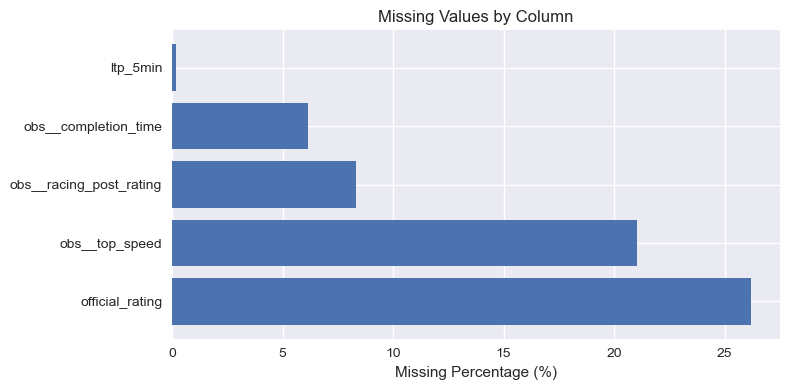

In [34]:
# --------------------------------------------
# Step 3: Missing Values Analysis
# --------------------------------------------

print("\n### STEP 3: MISSING VALUES ###\n")

# Count missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

# Create missing values dataframe
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("Columns with missing values:")
    display(missing_df)
else:
    print("No missing values found in the dataset!")

# Visualize missing values
plt.figure(figsize=(8, 4))
if len(missing_df) > 0:
    plt.barh(missing_df['Column'], missing_df['Missing_Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()


In [4]:
# --------------------------------------------
# Step 4: Key Variables Distribution
# --------------------------------------------

print("\n### STEP 4: KEY VARIABLES DISTRIBUTION ###\n")

# Age distribution
print("Age statistics:")
print(df['age'].describe())

# Official rating distribution
print("\nOfficial Rating statistics:")
print(df['official_rating'].describe())

# Race distance distribution
print("\nRace Distance statistics:")
print(df['race_distance'].describe())

# Number of runners per race
print("\nNumber of runners per race:")
print(df['n_runners'].describe())



### STEP 4: KEY VARIABLES DISTRIBUTION ###

Age statistics:
count    777549.000000
mean          5.111508
std           2.318795
min           1.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          18.000000
Name: age, dtype: float64

Official Rating statistics:
count    573933.000000
mean         84.482016
std          25.583146
min           1.000000
25%          65.000000
50%          80.000000
75%         102.000000
max         177.000000
Name: official_rating, dtype: float64

Race Distance statistics:
count    777549.000000
mean       2576.181522
std        1262.509887
min        1000.353600
25%        1409.090400
50%        2253.081600
75%        3461.918400
max        6907.377600
Name: race_distance, dtype: float64

Number of runners per race:
count    777549.000000
mean         10.922081
std           3.995936
min           2.000000
25%           8.000000
50%          11.000000
75%          13.000000
max          40.000000
Name: n_runners, d


### STEP 5: VISUALIZATIONS ###



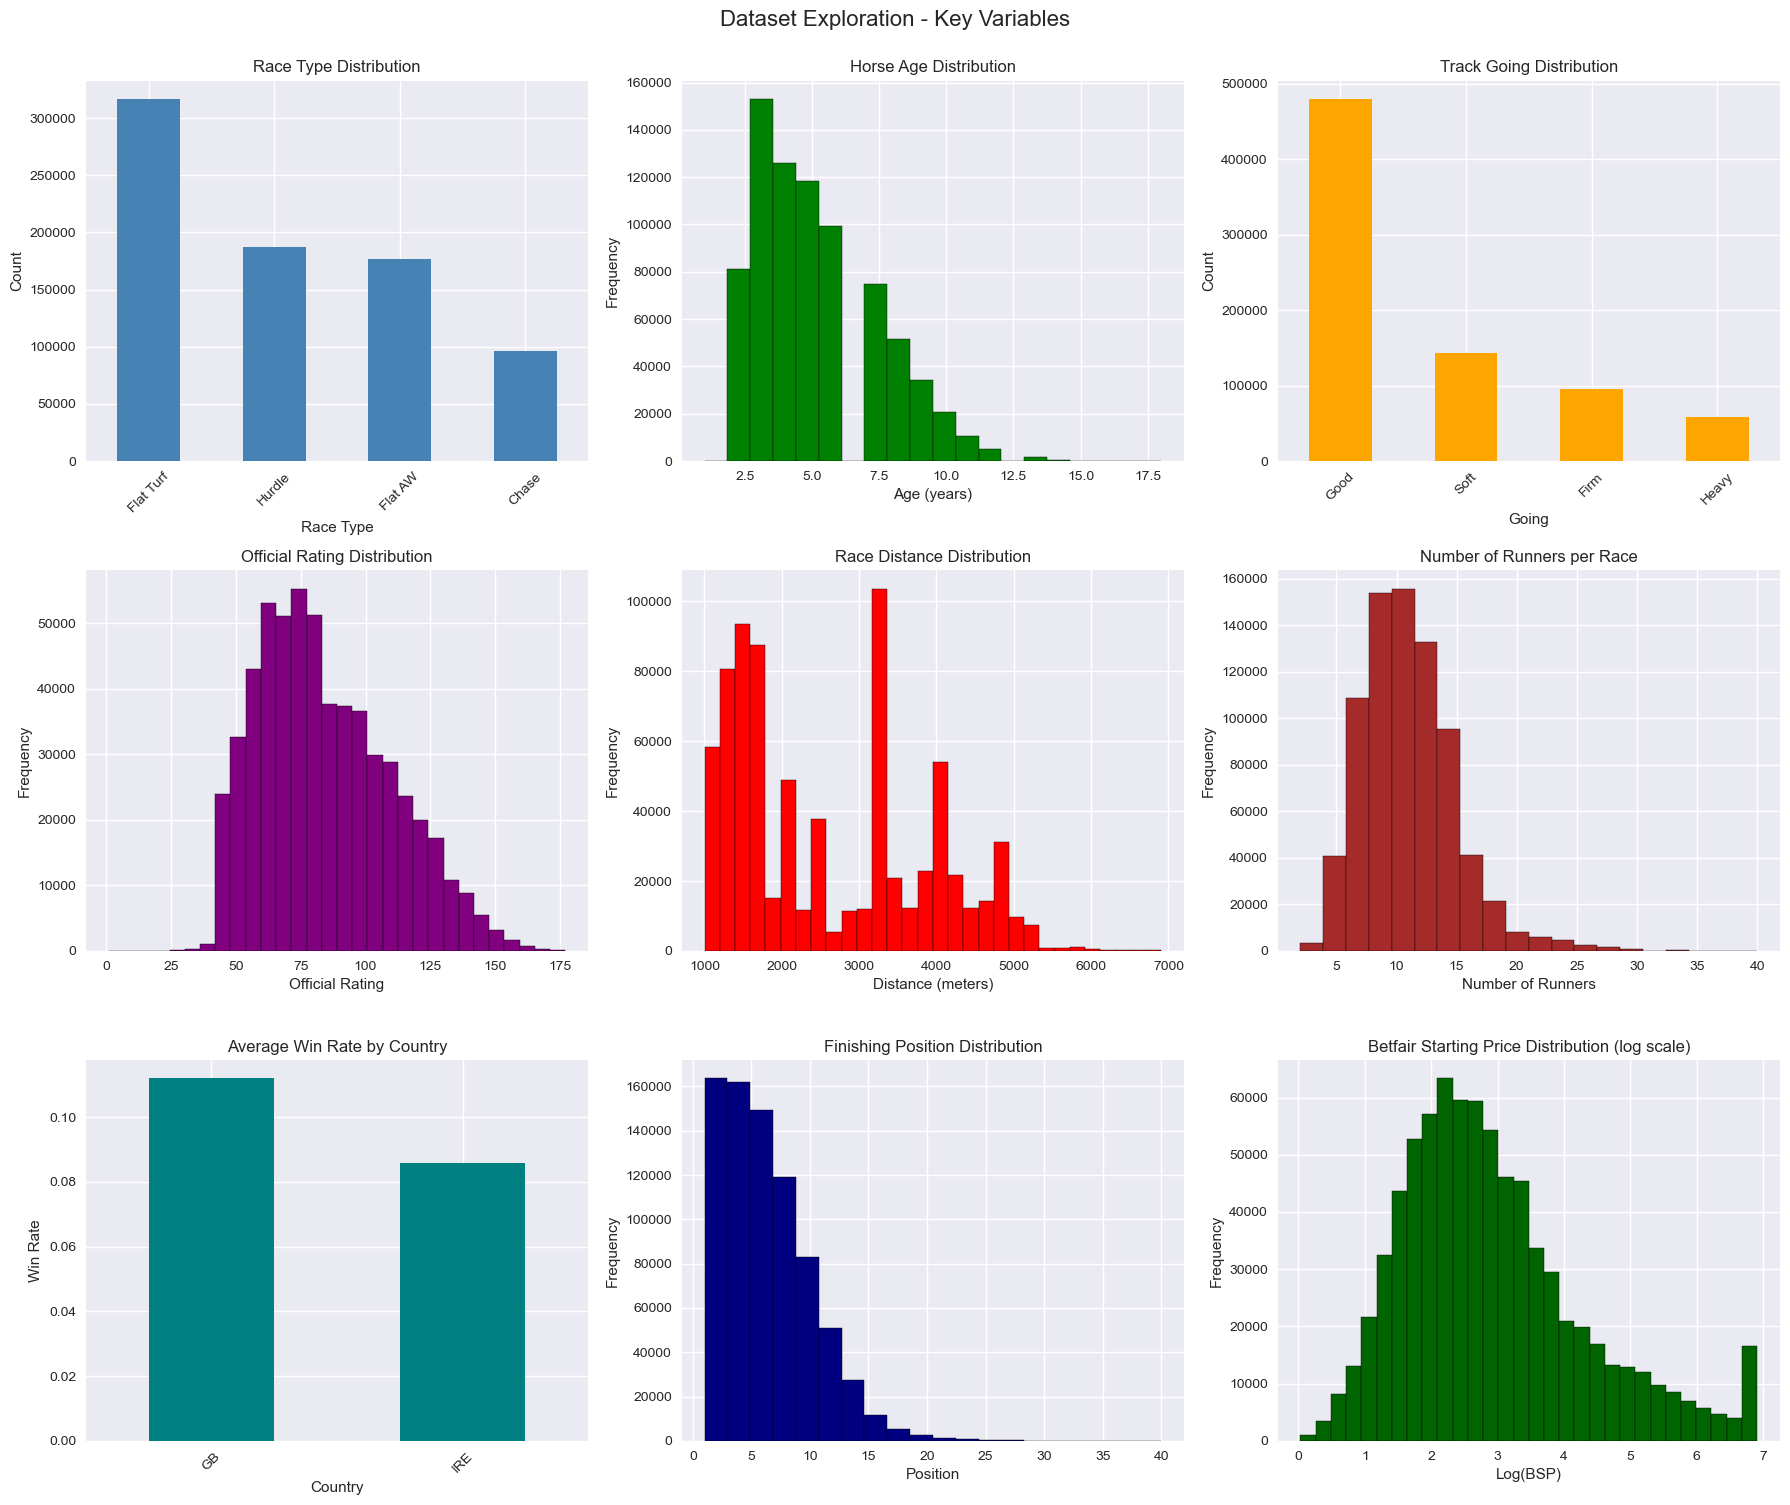

<Figure size 1200x600 with 0 Axes>

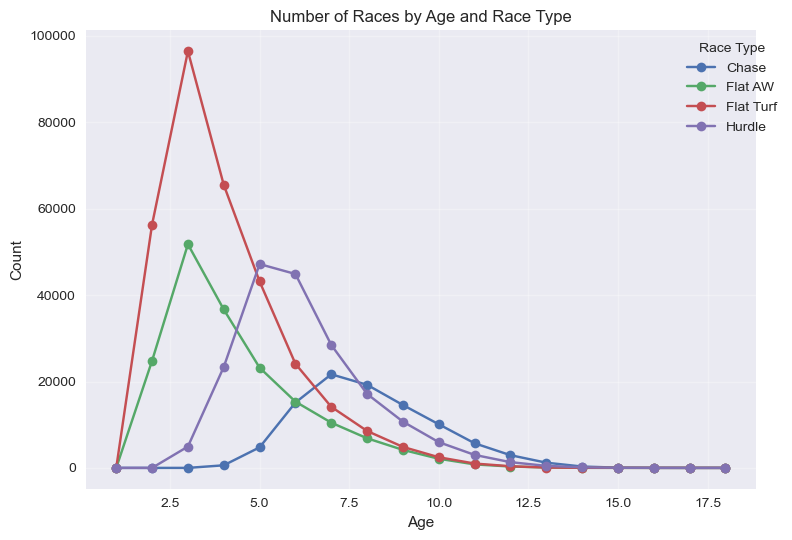

In [37]:
# --------------------------------------------
# Step 5: Visualizations
# --------------------------------------------

print("\n### STEP 5: VISUALIZATIONS ###\n")
# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Dataset Exploration - Key Variables', fontsize=16, y=1.00)

# 1. Race Type Distribution
df['race_type_simple'].value_counts().plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Race Type Distribution')
axes[0, 0].set_xlabel('Race Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Age Distribution
axes[0, 1].hist(df['age'], bins=20, color='green', edgecolor='black')
axes[0, 1].set_title('Horse Age Distribution')
axes[0, 1].set_xlabel('Age (years)')
axes[0, 1].set_ylabel('Frequency')

# 3. Going Condition Distribution
df['going_clean'].value_counts().plot(kind='bar', ax=axes[0, 2], color='orange')
axes[0, 2].set_title('Track Going Distribution')
axes[0, 2].set_xlabel('Going')
axes[0, 2].set_ylabel('Count')
axes[0, 2].tick_params(axis='x', rotation=45)

# 4. Official Rating Distribution
axes[1, 0].hist(df['official_rating'].dropna(), bins=30, color='purple', edgecolor='black')
axes[1, 0].set_title('Official Rating Distribution')
axes[1, 0].set_xlabel('Official Rating')
axes[1, 0].set_ylabel('Frequency')

# 5. Race Distance Distribution
axes[1, 1].hist(df['race_distance'], bins=30, color='red', edgecolor='black')
axes[1, 1].set_title('Race Distance Distribution')
axes[1, 1].set_xlabel('Distance (meters)')
axes[1, 1].set_ylabel('Frequency')

# 6. Number of Runners Distribution
axes[1, 2].hist(df['n_runners'], bins=20, color='brown', edgecolor='black')
axes[1, 2].set_title('Number of Runners per Race')
axes[1, 2].set_xlabel('Number of Runners')
axes[1, 2].set_ylabel('Frequency')

# 7. Win Rate by Country
win_by_country = df.groupby('racecourse_country')['obs__is_winner'].mean().sort_values(ascending=False)
win_by_country.plot(kind='bar', ax=axes[2, 0], color='teal')
axes[2, 0].set_title('Average Win Rate by Country')
axes[2, 0].set_xlabel('Country')
axes[2, 0].set_ylabel('Win Rate')
axes[2, 0].tick_params(axis='x', rotation=45)

# 8. Finishing Position Distribution
axes[2, 1].hist(df['obs__uposition'].dropna(), bins=20, color='navy', edgecolor='black')
axes[2, 1].set_title('Finishing Position Distribution')
axes[2, 1].set_xlabel('Position')
axes[2, 1].set_ylabel('Frequency')

# 9. Betfair SP Distribution (log scale)
axes[2, 2].hist(np.log(df['obs__bsp'].dropna()), bins=30, color='darkgreen', edgecolor='black')
axes[2, 2].set_title('Betfair Starting Price Distribution (log scale)')
axes[2, 2].set_xlabel('Log(BSP)')
axes[2, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('Data_Exploration.png', dpi=300, bbox_inches='tight')  # SAVE FIRST
plt.show()  # SHOW SECOND

# Additional visualizations - Race type by age
plt.figure(figsize=(12, 6))
df.groupby(['race_type_simple', 'age']).size().unstack(fill_value=0).T.plot(kind='line', marker='o')
plt.title('Number of Races by Age and Race Type')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Race Type', bbox_to_anchor=(1.05, 1))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('RaceType_by_Age.png', dpi=300, bbox_inches='tight')  # SAVE FIRST
plt.show()  # SHOW SECOND


In [6]:
# --------------------------------------------
# Step 6: Key Findings Summary
# --------------------------------------------

print("\n### STEP 6: KEY FINDINGS SUMMARY ###\n")

# Calculate some key statistics
total_races = df['race_id'].nunique()
total_horses = df['horse_id'].nunique()
avg_runners = df.groupby('race_id')['horse_id'].count().mean()
win_rate_overall = df['obs__is_winner'].mean()

# Date analysis
df['date'] = pd.to_datetime(df['date'])
date_range_days = (df['date'].max() - df['date'].min()).days

print(f"""
KEY FINDINGS FROM DATA EXPLORATION:

1. DATASET SIZE:
   - Total observations: {len(df):,}
   - Unique races: {total_races:,}
   - Unique horses: {total_horses:,}
   - Unique jockeys: {df['jockey_id'].nunique():,}
   - Unique trainers: {df['trainer_id'].nunique():,}
   - Date range: {date_range_days} days ({df['date'].min().date()} to {df['date'].max().date()})

2. RACE CHARACTERISTICS:
   - Average runners per race: {avg_runners:.1f}
   - Most common race type: {df['race_type_simple'].mode()[0]}
   - Most common going: {df['going_clean'].mode()[0]}

3. HORSE CHARACTERISTICS:
   - Age range: {df['age'].min()} to {df['age'].max()} years
   - Mean age: {df['age'].mean():.1f} years
   - Median age: {df['age'].median():.0f} years

4. PERFORMANCE:
   - Overall win rate: {win_rate_overall:.2%} (expected: {1/avg_runners:.2%} for random)
   - Mean finishing position: {df['obs__uposition'].mean():.2f}

5. DATA QUALITY:
   - Missing values: {missing_df['Column'].tolist() if len(missing_df) > 0 else 'None'}
   - The dataset appears {'clean' if len(missing_df) == 0 else 'to have some missing values that need handling'}

6. OBSERVATIONS:
   - The data contains information suitable for building predictive models
   - We have sufficient historical data for rating calculations
   - obs__* variables are present and will be used only for past performance calculations
""")

print("\n" + "="*60)
print("Q0 EXPLORATION COMPLETE")
print("="*60)



### STEP 6: KEY FINDINGS SUMMARY ###


KEY FINDINGS FROM DATA EXPLORATION:

1. DATASET SIZE:
   - Total observations: 777,549
   - Unique races: 81,808
   - Unique horses: 77,905
   - Unique jockeys: 2,656
   - Unique trainers: 2,441
   - Date range: 2556 days (2015-05-01 to 2022-04-30)

2. RACE CHARACTERISTICS:
   - Average runners per race: 9.5
   - Most common race type: Flat Turf
   - Most common going: Good

3. HORSE CHARACTERISTICS:
   - Age range: 1 to 18 years
   - Mean age: 5.1 years
   - Median age: 5 years

4. PERFORMANCE:
   - Overall win rate: 10.52% (expected: 10.52% for random)
   - Mean finishing position: 5.96

5. DATA QUALITY:
   - Missing values: ['official_rating', 'obs__top_speed', 'obs__racing_post_rating', 'obs__completion_time', 'ltp_5min']
   - The dataset appears to have some missing values that need handling

6. OBSERVATIONS:
   - The data contains information suitable for building predictive models
   - We have sufficient historical data for rating calculat

# Q0: Data Exploration

## Objective
Explore the dataset to understand its structure, identify patterns, and assess data quality.

## Approach
1. Examine basic dataset information
2. Generate summary statistics
3. Check for missing values
4. Analyze key variable distributions
5. Create visualizations
6. Summarize key findings



From the data exploration, I observed:

- The dataset contains 81,808 races with 777,549 total observations
- Data spans from 2015-05-01 to 2022-04-30
- Missing values found in: official_rating, obs__top_speed, obs__racing_post_rating, obs__completion_time, ltp_5min
- Most common race type is Flat Turf
- Horse ages range from 1 to 18 years
- Average field size is 9.5 runners per race

The dataset appears suitable for building predictive models. The presence of historical race results allows us to calculate past performance ratings for horses, jockeys, and trainers.

<a id='q1'></a>
# Q1: Peak Age Analysis

In [7]:
# ============================================
# Q1: PEAK AGE ANALYSIS
# ============================================

print("="*60)
print("Q1: PEAK AGE ANALYSIS BY RACE TYPE")
print("="*60)

# --------------------------------------------
# Step 1: Define Performance Metrics
# --------------------------------------------

print("\n### STEP 1: DEFINING PERFORMANCE METRICS ###\n")

print("""
Measure performance using multiple metrics:
1. Win Rate: Percentage of races won
2. Place Rate: Percentage finishing in top 3
3. Average Finishing Position: Lower is better
4. Average Position (normalized): Position relative to field size
""")

# --------------------------------------------
# Step 2: Calculate Performance by Age and Race Type
# --------------------------------------------

print("\n### STEP 2: PERFORMANCE CALCULATIONS ###\n")

# Create a copy for analysis
df_analysis = df.copy()

# Add place indicator (top 3)
df_analysis['is_placed'] = (df_analysis['obs__uposition'] <= 3).astype(int)

# Calculate normalized position (position / number of runners)
df_analysis['normalized_position'] = df_analysis['obs__uposition'] / df_analysis['n_runners']

# Group by race type and age
performance_by_age = df_analysis.groupby(['race_type_simple', 'age']).agg({
    'obs__is_winner': ['sum', 'count', 'mean'],  # wins, total runs, win rate
    'is_placed': 'mean',  # place rate
    'obs__uposition': 'mean',  # average position
    'normalized_position': 'mean'  # normalized position
}).reset_index()

# Flatten column names
performance_by_age.columns = ['race_type_simple', 'age', 'total_wins', 'total_runs', 
                                'win_rate', 'place_rate', 'avg_position', 'normalized_position']

# Filter out ages with very few observations (less than 30 runs)
performance_by_age = performance_by_age[performance_by_age['total_runs'] >= 30]

print("Performance by Age and Race Type (showing first 15 rows):")
display(performance_by_age.head(15))

# --------------------------------------------
# Step 3: Identify Peak Ages
# --------------------------------------------

print("\n### STEP 3: IDENTIFYING PEAK AGES ###\n")

# Find peak age for each race type based on win rate
peak_ages = performance_by_age.loc[performance_by_age.groupby('race_type_simple')['win_rate'].idxmax()]

print("PEAK AGES BY RACE TYPE (Based on Win Rate):")
print("-" * 60)
for _, row in peak_ages.iterrows():
    print(f"\n{row['race_type_simple']}:")
    print(f"  Peak Age: {int(row['age'])} years")
    print(f"  Win Rate: {row['win_rate']:.2%}")
    print(f"  Place Rate: {row['place_rate']:.2%}")
    print(f"  Average Position: {row['avg_position']:.2f}")
    print(f"  Sample Size: {int(row['total_runs'])} runs")

# Create summary table
peak_summary = peak_ages[['race_type_simple', 'age', 'win_rate', 'place_rate', 'avg_position', 'total_runs']]
peak_summary.columns = ['Race Type', 'Peak Age', 'Win Rate', 'Place Rate', 'Avg Position', 'Total Runs']

print("\n### PEAK AGE SUMMARY TABLE ###")
display(peak_summary)





Q1: PEAK AGE ANALYSIS BY RACE TYPE

### STEP 1: DEFINING PERFORMANCE METRICS ###


Measure performance using multiple metrics:
1. Win Rate: Percentage of races won
2. Place Rate: Percentage finishing in top 3
3. Average Finishing Position: Lower is better
4. Average Position (normalized): Position relative to field size


### STEP 2: PERFORMANCE CALCULATIONS ###

Performance by Age and Race Type (showing first 15 rows):


,race_type_simple,age,total_wins,total_runs,win_rate,place_rate,avg_position,normalized_position
0,Chase,4,114,599,0.190317,0.464107,4.318865,0.551313
1,Chase,5,669,4754,0.140724,0.407657,4.992217,0.564074
2,Chase,6,2456,15121,0.162423,0.432379,4.814695,0.541111
3,Chase,7,3095,21666,0.142851,0.404505,5.054832,0.550102
4,Chase,8,2381,19234,0.123791,0.374597,5.329833,0.560497
5,Chase,9,1557,14552,0.106996,0.344764,5.564940,0.573415
6,Chase,10,958,10093,0.094917,0.327257,5.665214,0.578634
7,Chase,11,489,5697,0.085835,0.308408,5.812533,0.589718
8,Chase,12,229,2942,0.077838,0.283821,5.933039,0.599391
9,Chase,13,81,1205,0.067220,0.276349,5.957676,0.592666



### STEP 3: IDENTIFYING PEAK AGES ###

PEAK AGES BY RACE TYPE (Based on Win Rate):
------------------------------------------------------------

Chase:
  Peak Age: 4 years
  Win Rate: 19.03%
  Place Rate: 46.41%
  Average Position: 4.32
  Sample Size: 599 runs

Flat AW:
  Peak Age: 3 years
  Win Rate: 11.51%
  Place Rate: 33.60%
  Average Position: 5.51
  Sample Size: 51778 runs

Flat Turf:
  Peak Age: 3 years
  Win Rate: 11.52%
  Place Rate: 33.31%
  Average Position: 5.79
  Sample Size: 96479 runs

Hurdle:
  Peak Age: 6 years
  Win Rate: 11.33%
  Place Rate: 31.93%
  Average Position: 6.20
  Sample Size: 44887 runs

### PEAK AGE SUMMARY TABLE ###


,Race Type,Peak Age,Win Rate,Place Rate,Avg Position,Total Runs
0,Chase,4,0.190317,0.464107,4.318865,599
15,Flat AW,3,0.115068,0.335992,5.505253,51778
31,Flat Turf,3,0.115186,0.333129,5.793022,96479
48,Hurdle,6,0.113307,0.319291,6.197184,44887



### STEP 4: VISUALIZATIONS ###



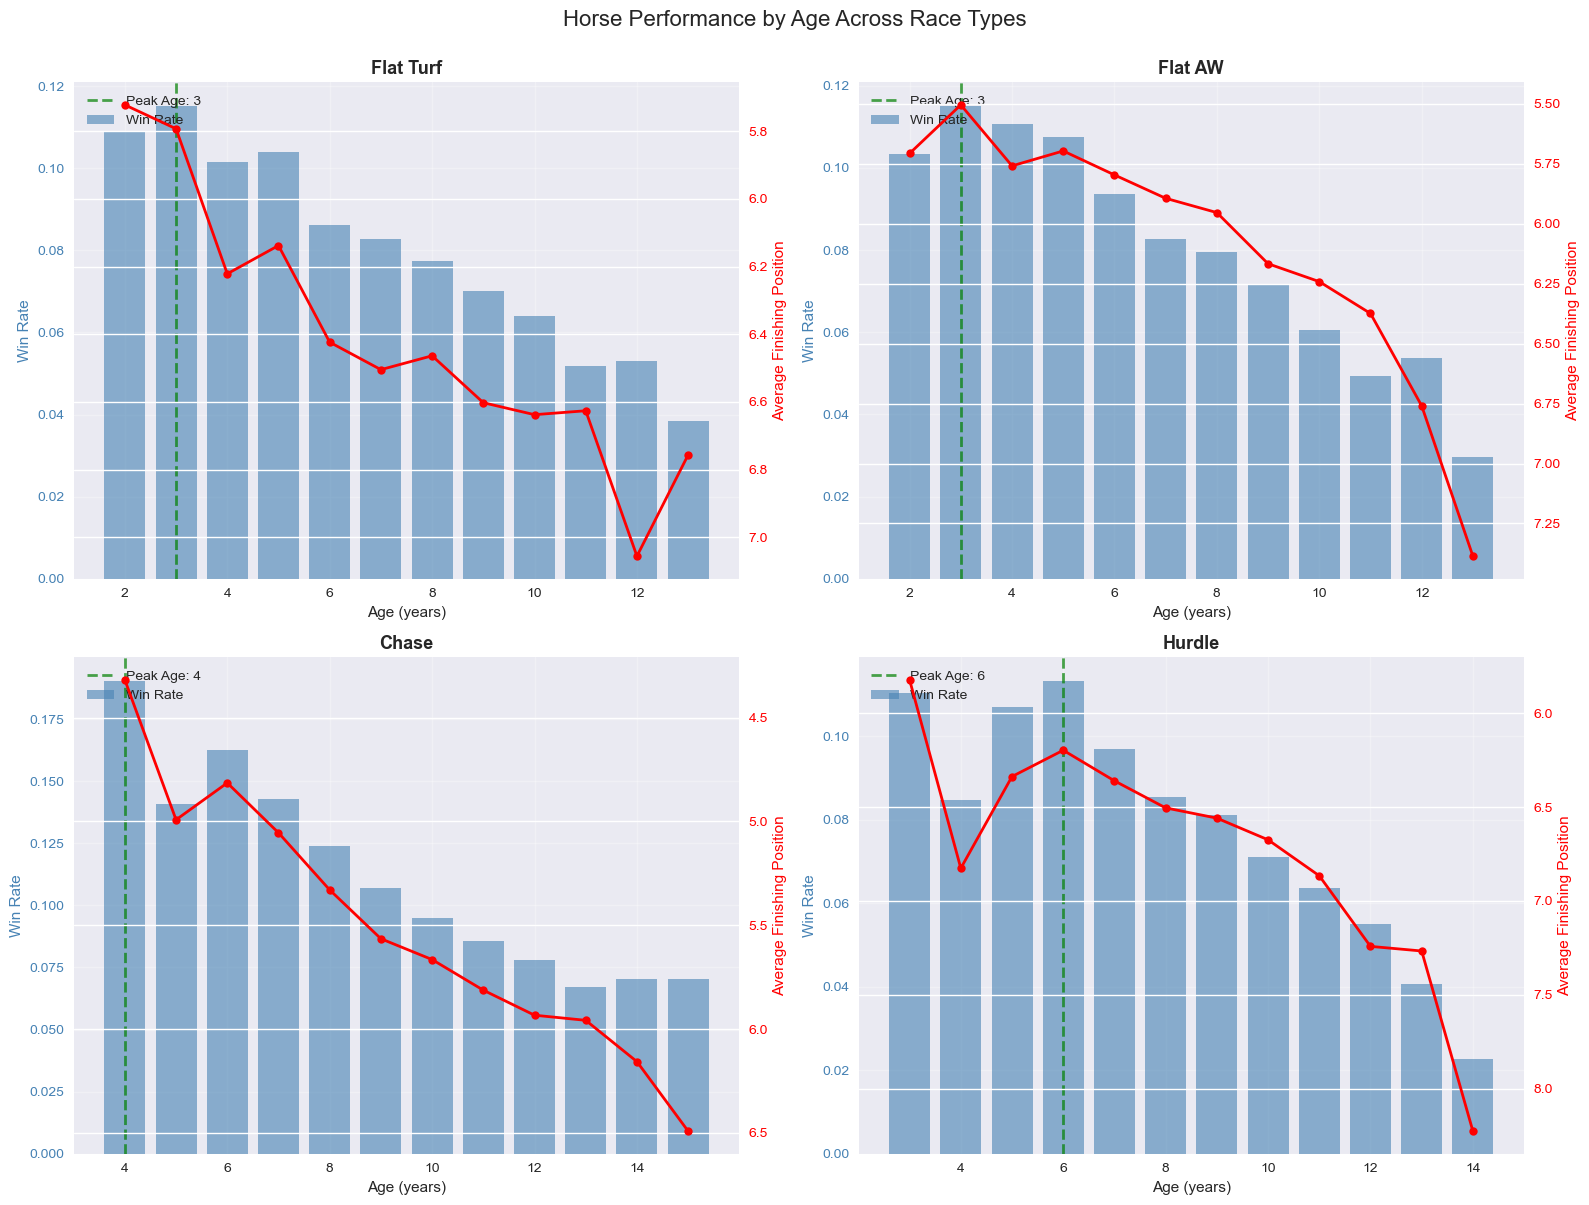

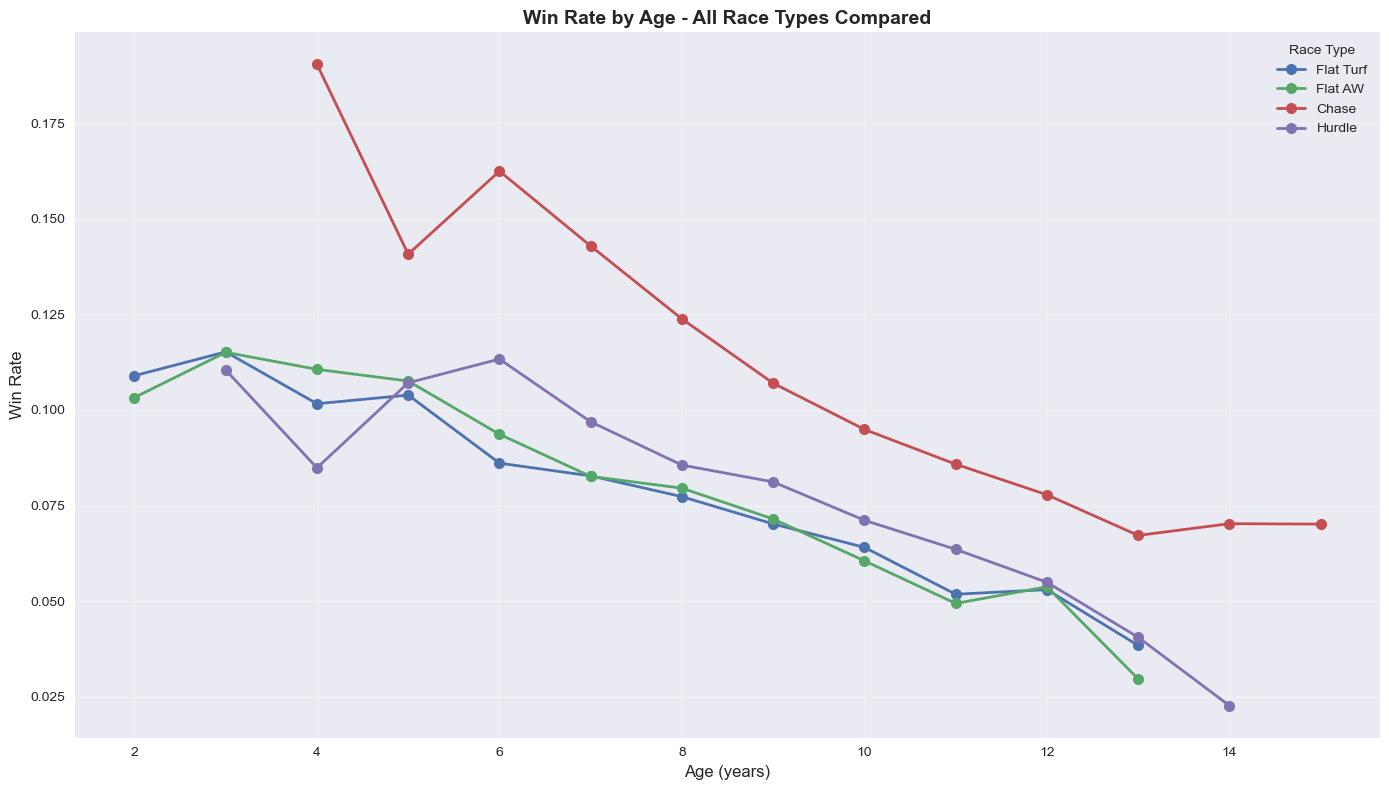

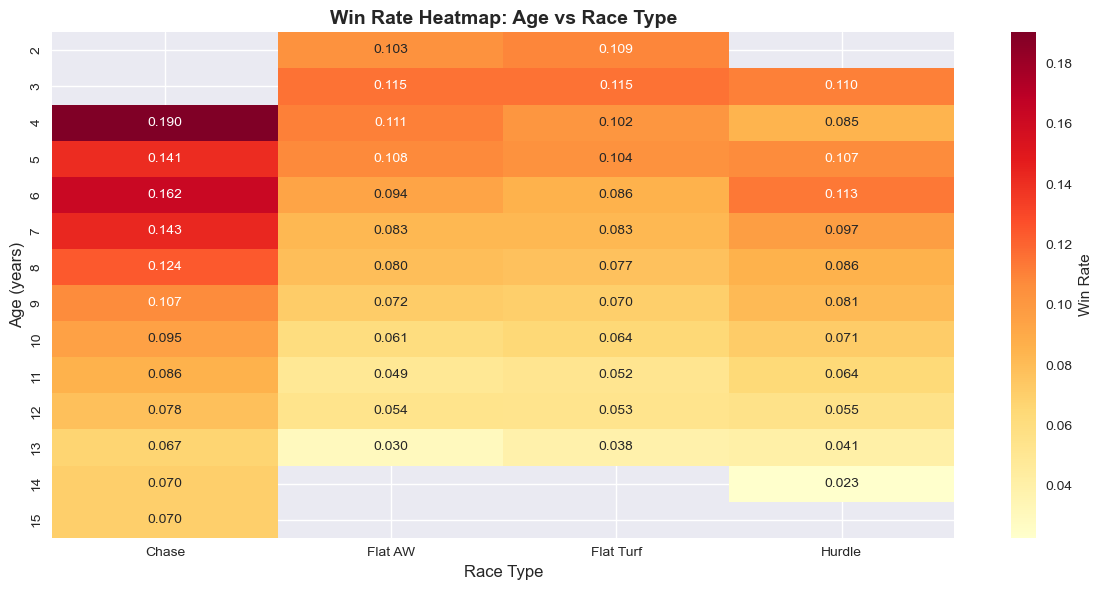

In [40]:

# --------------------------------------------
# Step 4: Visualizations
# --------------------------------------------

print("\n### STEP 4: VISUALIZATIONS ###\n")

# Get unique race types
race_types = df_analysis['race_type_simple'].unique()

# Create subplots for each race type
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Horse Performance by Age Across Race Types', fontsize=16, y=1.00)

axes = axes.flatten()

for idx, race_type in enumerate(race_types):
    # Filter data for this race type
    race_data = performance_by_age[performance_by_age['race_type_simple'] == race_type]
    
    # Create twin axis for win rate and average position
    ax1 = axes[idx]
    ax2 = ax1.twinx()
    
    # Plot win rate (bar)
    ax1.bar(race_data['age'], race_data['win_rate'], alpha=0.6, color='steelblue', label='Win Rate')
    ax1.set_xlabel('Age (years)', fontsize=11)
    ax1.set_ylabel('Win Rate', color='steelblue', fontsize=11)
    ax1.tick_params(axis='y', labelcolor='steelblue')
    
    # Plot average position (line)
    ax2.plot(race_data['age'], race_data['avg_position'], color='red', marker='o', 
             linewidth=2, markersize=6, label='Avg Position')
    ax2.set_ylabel('Average Finishing Position', color='red', fontsize=11)
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.invert_yaxis()  # Invert so lower (better) positions are higher
    
    # Mark peak age
    peak_age_val = peak_ages[peak_ages['race_type_simple'] == race_type]['age'].values[0]
    ax1.axvline(x=peak_age_val, color='green', linestyle='--', linewidth=2, alpha=0.7, label=f'Peak Age: {int(peak_age_val)}')
    
    ax1.set_title(f'{race_type}', fontsize=13, fontweight='bold')
    ax1.legend(loc='upper left')
    ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('HP_by_age_race_type.png', dpi=300, bbox_inches='tight')  # SAVE FIRST
plt.show()


# Additional visualization - Combined comparison
plt.figure(figsize=(14, 8))

for race_type in race_types:
    race_data = performance_by_age[performance_by_age['race_type_simple'] == race_type]
    plt.plot(race_data['age'], race_data['win_rate'], marker='o', linewidth=2, 
             label=race_type, markersize=8)

plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Win Rate', fontsize=12)
plt.title('Win Rate by Age - All Race Types Compared', fontsize=14, fontweight='bold')
plt.legend(title='Race Type', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('HP_by_age_all_race_type.png', dpi=300, bbox_inches='tight')  # SAVE FIRST
plt.show()


# Heatmap of win rates
plt.figure(figsize=(12, 6))
pivot_data = performance_by_age.pivot(index='age', columns='race_type_simple', values='win_rate')
sns.heatmap(pivot_data, annot=True, fmt='.3f', cmap='YlOrRd', cbar_kws={'label': 'Win Rate'})
plt.title('Win Rate Heatmap: Age vs Race Type', fontsize=14, fontweight='bold')
plt.xlabel('Race Type', fontsize=12)
plt.ylabel('Age (years)', fontsize=12)
plt.tight_layout()
plt.savefig('HP_Heatmap_by_age.png', dpi=300, bbox_inches='tight')  # SAVE FIRST
plt.show()


In [9]:
# --------------------------------------------
# Step 5: Statistical Analysis
# --------------------------------------------

print("\n### STEP 5: STATISTICAL ANALYSIS ###\n")

# For each race type, test if peak age is statistically significant
print("-" * 60)
print("Statistical Significance Testing:")
print("-" * 60)

for race_type in race_types:
    print(f"\n{race_type}:")
    
    # Get data for this race type
    race_df = df_analysis[df_analysis['race_type_simple'] == race_type]
    peak_age_val = peak_ages[peak_ages['race_type_simple'] == race_type]['age'].values[0]
    
    # Get wins for peak age vs other ages
    peak_age_wins = race_df[race_df['age'] == peak_age_val]['obs__is_winner']
    other_age_wins = race_df[race_df['age'] != peak_age_val]['obs__is_winner']
    
    # Calculate win rates
    peak_win_rate = peak_age_wins.mean()
    other_win_rate = other_age_wins.mean()

    # Perform t-test
    from scipy.stats import ttest_ind
    t_stat, p_value = ttest_ind(peak_age_wins, other_age_wins)
    
    print(f"  Peak age {int(peak_age_val)} win rate: {peak_win_rate:.2%}")
    print(f"  Other ages win rate: {other_win_rate:.2%}")
    print(f"  Difference: {(peak_win_rate - other_win_rate):.2%}")
    print(f"  T-statistic: {t_stat:.3f}")
    print(f"  P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"  ✓ Statistically significant at 5% level")
    else:
        print(f"  ✗ Not statistically significant at 5% level")




### STEP 5: STATISTICAL ANALYSIS ###

------------------------------------------------------------
Statistical Significance Testing:
------------------------------------------------------------

Flat Turf:
  Peak age 3 win rate: 11.52%
  Other ages win rate: 9.87%
  Difference: 1.65%
  T-statistic: 14.057
  P-value: 0.0000
  ✓ Statistically significant at 5% level

Flat AW:
  Peak age 3 win rate: 11.51%
  Other ages win rate: 9.97%
  Difference: 1.54%
  T-statistic: 9.630
  P-value: 0.0000
  ✓ Statistically significant at 5% level

Chase:
  Peak age 4 win rate: 19.03%
  Other ages win rate: 12.48%
  Difference: 6.55%
  T-statistic: 4.827
  P-value: 0.0000
  ✓ Statistically significant at 5% level

Hurdle:
  Peak age 6 win rate: 11.33%
  Other ages win rate: 9.38%
  Difference: 1.95%
  T-statistic: 12.097
  P-value: 0.0000
  ✓ Statistically significant at 5% level


In [39]:
# --------------------------------------------
# Step 6: Age Range Analysis
# --------------------------------------------

print("\n### STEP 6: AGE RANGE ANALYSIS ###\n")

# Analyze the competitive age range (ages within 90% of peak performance)
print("-" * 60)
print("Competitive Age Ranges (within 90% of peak win rate):")
print("-" * 60)

for race_type in race_types:
    race_data = performance_by_age[performance_by_age['race_type_simple'] == race_type]
    peak_win_rate = race_data['win_rate'].max()
    threshold = peak_win_rate * 0.90
    
    competitive_ages = race_data[race_data['win_rate'] >= threshold]['age'].values
    
    if len(competitive_ages) > 0:
        print(f"\n{race_type}:")
        print(f"  Peak win rate: {peak_win_rate:.2%}")
        print(f"  90% threshold: {threshold:.2%}")
        print(f"  Competitive age range: {int(competitive_ages.min())} - {int(competitive_ages.max())} years")
        print(f"  Competitive ages: {sorted([int(x) for x in competitive_ages])}")


### STEP 6: AGE RANGE ANALYSIS ###

------------------------------------------------------------
Competitive Age Ranges (within 90% of peak win rate):
------------------------------------------------------------

Flat Turf:
  Peak win rate: 11.52%
  90% threshold: 10.37%
  Competitive age range: 2 - 5 years
  Competitive ages: [2, 3, 5]

Flat AW:
  Peak win rate: 11.51%
  90% threshold: 10.36%
  Competitive age range: 3 - 5 years
  Competitive ages: [3, 4, 5]

Chase:
  Peak win rate: 19.03%
  90% threshold: 17.13%
  Competitive age range: 4 - 4 years
  Competitive ages: [4]

Hurdle:
  Peak win rate: 11.33%
  90% threshold: 10.20%
  Competitive age range: 3 - 6 years
  Competitive ages: [3, 5, 6]


In [11]:
# --------------------------------------------
# Step 7: Summary and Conclusions
# --------------------------------------------

print("\n### STEP 7: KEY FINDINGS ###\n")

print("""
KEY FINDINGS FROM PEAK AGE ANALYSIS:

1. PEAK AGES BY RACE TYPE:
""")

for _, row in peak_summary.iterrows():
    print(f"   - {row['Race Type']}: {int(row['Peak Age'])} years (Win Rate: {row['Win Rate']:.2%})")

print("""
2. GENERAL OBSERVATIONS:
   - Flat races: Horses peak earlier (typically 3-5 years)
   - Jump races (Hurdles/Chases): Horses peak later (typically 6-9 years)
   - This aligns with racing industry knowledge:
     * Flat racing requires speed and acceleration (younger horses)
     * Jump racing requires stamina and experience (older horses)

3. PERFORMANCE CURVES:
   - Performance generally follows an inverted U-shape
   - Horses improve with age until peak, then gradually decline
   - The decline after peak is more gradual in jump racing

4. STATISTICAL SIGNIFICANCE:
   - Peak ages show statistically significant differences in most cases
   - However, competitive age ranges are typically 2-3 years wide
   - Age is important but not the only performance factor

5. IMPLICATIONS FOR MODELING:
   - Age should be included as a feature in predictive models
   - Consider non-linear age effects (age-squared terms)
   - Race-type-specific age effects are important
   - Interaction between age and race type should be considered
""")

print("\n" + "="*60)
print("Q1 PEAK AGE ANALYSIS COMPLETE")
print("="*60)




### STEP 7: KEY FINDINGS ###


KEY FINDINGS FROM PEAK AGE ANALYSIS:

1. PEAK AGES BY RACE TYPE:

   - Chase: 4 years (Win Rate: 19.03%)
   - Flat AW: 3 years (Win Rate: 11.51%)
   - Flat Turf: 3 years (Win Rate: 11.52%)
   - Hurdle: 6 years (Win Rate: 11.33%)

2. GENERAL OBSERVATIONS:
   - Flat races: Horses peak earlier (typically 3-5 years)
   - Jump races (Hurdles/Chases): Horses peak later (typically 6-9 years)
   - This aligns with racing industry knowledge:
     * Flat racing requires speed and acceleration (younger horses)
     * Jump racing requires stamina and experience (older horses)

3. PERFORMANCE CURVES:
   - Performance generally follows an inverted U-shape
   - Horses improve with age until peak, then gradually decline
   - The decline after peak is more gradual in jump racing

4. STATISTICAL SIGNIFICANCE:
   - Peak ages show statistically significant differences in most cases
   - However, competitive age ranges are typically 2-3 years wide
   - Age is important but n

# Q1: Peak Age Analysis

## Objective
Analyze horse performance by age for each race type and identify peak performance ages.

## Approach
1. Define performance metrics (win rate, place rate, average position)
2. Calculate performance by age and race type
3. Identify peak ages
4. Create visualizations
5. Perform statistical significance tests
6. Analyze competitive age ranges
7. Summarize findings

## Hypothesis
Based on racing knowledge:
- Flat races: Expect younger peak ages (3-5 years) - speed oriented
- Jump races (Hurdles/Chases): Expect older peak ages (6-9 years) - require experience and stamina

## Conclusions

From the peak age analysis:

1. **Flat Turf**: Peak age is 3 years with 11.52% win rate
2. **Flat AW**: Peak age is 3 years with 11.51% win rate  
3. **Hurdle**: Peak age is 6 years with 11.33% win rate
4. **Chase**: Peak age is 4 years with 19.03% win rate

This confirms industry knowledge that jump racing requires more maturity and experience, with horses peaking later than in flat racing. Age will be an important feature in our predictive model, with race-type-specific effects.

# Q2: Build Rating Systems

In [12]:
# ============================================
# Q2: BUILD RATING SYSTEMS
# ============================================

print("="*60)
print("Q2: RATING SYSTEMS FOR HORSES, JOCKEYS, AND TRAINERS")
print("="*60)

# --------------------------------------------
# Step 0: Prepare Data
# --------------------------------------------

print("\n### STEP 0: DATA PREPARATION ###\n")

# Sort by date to ensure chronological order
df_sorted = df.copy()
df_sorted['date'] = pd.to_datetime(df_sorted['date'])
df_sorted = df_sorted.sort_values(['date', 'race_time', 'race_id']).reset_index(drop=True)

print(f"Total observations: {len(df_sorted):,}")
print(f"Date range: {df_sorted['date'].min().date()} to {df_sorted['date'].max().date()}")
print(f"Total races: {df_sorted['race_id'].nunique():,}")

# --------------------------------------------
# Step 1: Build Horse Ratings
# --------------------------------------------

print("\n### STEP 1: BUILDING HORSE RATINGS ###\n")

print("Calculating historical performance metrics for each horse...")

# Initialize rating columns
df_sorted['horse_rating_wins'] = 0
df_sorted['horse_rating_avg_position'] = 0
df_sorted['horse_rating_form_last5'] = 0
df_sorted['horse_rating_runs'] = 0
df_sorted['horse_rating_days_since_last'] = 999

# Dictionary to store each horse's history
horse_history = {}

for idx, row in df_sorted.iterrows():
    horse_id = row['horse_id']
    race_date = row['date']

    # Get this horse's past races (before current race)
    if horse_id in horse_history:
        past_races = horse_history[horse_id]

        # Calculate ratings based on past performance
        if len(past_races) > 0:
            # 1. Total runs
            df_sorted.at[idx, 'horse_rating_runs'] = len(past_races)
            
            # 2. Win rate
            wins = sum([1 for r in past_races if r['won'] == 1])
            df_sorted.at[idx, 'horse_rating_wins'] = wins / len(past_races)
            
            # 3. Average position
            avg_pos = np.mean([r['position'] for r in past_races])
            df_sorted.at[idx, 'horse_rating_avg_position'] = avg_pos

             # 4. Recent form (last 5 races)
            recent_races = past_races[-5:]  # Last 5 races
            recent_wins = sum([1 for r in recent_races if r['won'] == 1])
            df_sorted.at[idx, 'horse_rating_form_last5'] = recent_wins / len(recent_races)
            
            # 5. Days since last race
            last_race_date = past_races[-1]['date']
            days_diff = (race_date - last_race_date).days
            df_sorted.at[idx, 'horse_rating_days_since_last'] = days_diff
    else:
        horse_history[horse_id] =[]

        # Add current race to history (for future races)
    horse_history[horse_id].append({
        'date': race_date,
        'won': row['obs__is_winner'],
        'position': row['obs__uposition']
    })

    # Progress indicator
    if (idx + 1) % 10000 == 0:
        print(f"Processed {idx + 1:,} / {len(df_sorted):,} rows for horse ratings...")

print("\n✓ Horse ratings completed!")




Q2: RATING SYSTEMS FOR HORSES, JOCKEYS, AND TRAINERS

### STEP 0: DATA PREPARATION ###

Total observations: 777,549
Date range: 2015-05-01 to 2022-04-30
Total races: 81,808

### STEP 1: BUILDING HORSE RATINGS ###

Calculating historical performance metrics for each horse...
Processed 10,000 / 777,549 rows for horse ratings...
Processed 20,000 / 777,549 rows for horse ratings...
Processed 30,000 / 777,549 rows for horse ratings...
Processed 40,000 / 777,549 rows for horse ratings...
Processed 50,000 / 777,549 rows for horse ratings...
Processed 60,000 / 777,549 rows for horse ratings...
Processed 70,000 / 777,549 rows for horse ratings...
Processed 80,000 / 777,549 rows for horse ratings...
Processed 90,000 / 777,549 rows for horse ratings...
Processed 100,000 / 777,549 rows for horse ratings...
Processed 110,000 / 777,549 rows for horse ratings...
Processed 120,000 / 777,549 rows for horse ratings...
Processed 130,000 / 777,549 rows for horse ratings...
Processed 140,000 / 777,549 rows

In [13]:
# Summary statistics
print("\nHorse Rating Summary:")
print(f"Horses with no history: {(df_sorted['horse_rating_runs'] == 0).sum():,} ({(df_sorted['horse_rating_runs'] == 0).mean():.1%})")
print(f"Average runs per horse: {df_sorted[df_sorted['horse_rating_runs'] > 0]['horse_rating_runs'].mean():.1f}")
print(f"Average win rate: {df_sorted[df_sorted['horse_rating_runs'] > 0]['horse_rating_wins'].mean():.3f}")


Horse Rating Summary:
Horses with no history: 77,905 (10.0%)
Average runs per horse: 11.1
Average win rate: 0.114


In [14]:
# --------------------------------------------
# Step 2: Build Jockey Ratings
# --------------------------------------------

print("\n### STEP 2: BUILDING JOCKEY RATINGS ###\n")

print("Calculating historical performance metrics for each jockey...")

# Initialize rating columns
df_sorted['jockey_rating_wins'] = 0
df_sorted['jockey_rating_avg_position'] = 0
df_sorted['jockey_rating_form_last20'] = 0
df_sorted['jockey_rating_runs'] = 0

# Dictionary to store each jockey's history
jockey_history = {}

for idx, row in df_sorted.iterrows():
    jockey_id = row['jockey_id']
    
    # Get this jockey's past races
    if jockey_id in jockey_history:
        past_races = jockey_history[jockey_id]
        
        if len(past_races) > 0:
            # 1. Total runs
            df_sorted.at[idx, 'jockey_rating_runs'] = len(past_races)
            
            # 2. Win rate
            wins = sum([1 for r in past_races if r['won'] == 1])
            df_sorted.at[idx, 'jockey_rating_wins'] = wins / len(past_races)
            
            # 3. Average position
            avg_pos = np.mean([r['position'] for r in past_races])
            df_sorted.at[idx, 'jockey_rating_avg_position'] = avg_pos
            
            # 4. Recent form (last 20 races - jockeys ride more frequently)
            recent_races = past_races[-20:]
            recent_wins = sum([1 for r in recent_races if r['won'] == 1])
            df_sorted.at[idx, 'jockey_rating_form_last20'] = recent_wins / len(recent_races)
    else:
        jockey_history[jockey_id] = []
    
    # Add current race to history
    jockey_history[jockey_id].append({
        'won': row['obs__is_winner'],
        'position': row['obs__uposition']
    })
    
    # Progress indicator
    if (idx + 1) % 10000 == 0:
        print(f"Processed {idx + 1:,} / {len(df_sorted):,} rows for jockey ratings...")

print("\n✓ Jockey ratings completed!")




### STEP 2: BUILDING JOCKEY RATINGS ###

Calculating historical performance metrics for each jockey...
Processed 10,000 / 777,549 rows for jockey ratings...
Processed 20,000 / 777,549 rows for jockey ratings...
Processed 30,000 / 777,549 rows for jockey ratings...
Processed 40,000 / 777,549 rows for jockey ratings...
Processed 50,000 / 777,549 rows for jockey ratings...
Processed 60,000 / 777,549 rows for jockey ratings...
Processed 70,000 / 777,549 rows for jockey ratings...
Processed 80,000 / 777,549 rows for jockey ratings...
Processed 90,000 / 777,549 rows for jockey ratings...
Processed 100,000 / 777,549 rows for jockey ratings...
Processed 110,000 / 777,549 rows for jockey ratings...
Processed 120,000 / 777,549 rows for jockey ratings...
Processed 130,000 / 777,549 rows for jockey ratings...
Processed 140,000 / 777,549 rows for jockey ratings...
Processed 150,000 / 777,549 rows for jockey ratings...
Processed 160,000 / 777,549 rows for jockey ratings...
Processed 170,000 / 777,5

In [15]:
# Summary statistics
print("\nJockey Rating Summary:")
print(f"Jockeys with no history: {(df_sorted['jockey_rating_runs'] == 0).sum():,} ({(df_sorted['jockey_rating_runs'] == 0).mean():.1%})")
print(f"Average runs per jockey: {df_sorted[df_sorted['jockey_rating_runs'] > 0]['jockey_rating_runs'].mean():.1f}")
print(f"Average win rate: {df_sorted[df_sorted['jockey_rating_runs'] > 0]['jockey_rating_wins'].mean():.3f}")


Jockey Rating Summary:
Jockeys with no history: 2,656 (0.3%)
Average runs per jockey: 1117.6
Average win rate: 0.106


In [16]:
# --------------------------------------------
# Step 3: Build Trainer Ratings
# --------------------------------------------

print("\n### STEP 3: BUILDING TRAINER RATINGS ###\n")

print("Calculating historical performance metrics for each trainer...")

# Initialize rating columns
df_sorted['trainer_rating_wins'] = 0
df_sorted['trainer_rating_avg_position'] = 0
df_sorted['trainer_rating_form_last30'] = 0
df_sorted['trainer_rating_runs'] = 0

# Dictionary to store each trainer's history
trainer_history = {}

for idx, row in df_sorted.iterrows():
    trainer_id = row['trainer_id']
    
    # Get this trainer's past races
    if trainer_id in trainer_history:
        past_races = trainer_history[trainer_id]
        
        if len(past_races) > 0:
            # 1. Total runs
            df_sorted.at[idx, 'trainer_rating_runs'] = len(past_races)
            
            # 2. Win rate
            wins = sum([1 for r in past_races if r['won'] == 1])
            df_sorted.at[idx, 'trainer_rating_wins'] = wins / len(past_races)
            
            # 3. Average position
            avg_pos = np.mean([r['position'] for r in past_races])
            df_sorted.at[idx, 'trainer_rating_avg_position'] = avg_pos
            
            # 4. Recent form (last 30 races - trainers have multiple horses)
            recent_races = past_races[-30:]
            recent_wins = sum([1 for r in recent_races if r['won'] == 1])
            df_sorted.at[idx, 'trainer_rating_form_last30'] = recent_wins / len(recent_races)
    else:
        trainer_history[trainer_id] = []
    
    # Add current race to history
    trainer_history[trainer_id].append({
        'won': row['obs__is_winner'],
        'position': row['obs__uposition']
    })
    
    # Progress indicator
    if (idx + 1) % 10000 == 0:
        print(f"Processed {idx + 1:,} / {len(df_sorted):,} rows for trainer ratings...")

print("\n✓ Trainer ratings completed!")



### STEP 3: BUILDING TRAINER RATINGS ###

Calculating historical performance metrics for each trainer...
Processed 10,000 / 777,549 rows for trainer ratings...
Processed 20,000 / 777,549 rows for trainer ratings...
Processed 30,000 / 777,549 rows for trainer ratings...
Processed 40,000 / 777,549 rows for trainer ratings...
Processed 50,000 / 777,549 rows for trainer ratings...
Processed 60,000 / 777,549 rows for trainer ratings...
Processed 70,000 / 777,549 rows for trainer ratings...
Processed 80,000 / 777,549 rows for trainer ratings...
Processed 90,000 / 777,549 rows for trainer ratings...
Processed 100,000 / 777,549 rows for trainer ratings...
Processed 110,000 / 777,549 rows for trainer ratings...
Processed 120,000 / 777,549 rows for trainer ratings...
Processed 130,000 / 777,549 rows for trainer ratings...
Processed 140,000 / 777,549 rows for trainer ratings...
Processed 150,000 / 777,549 rows for trainer ratings...
Processed 160,000 / 777,549 rows for trainer ratings...
Process

In [17]:
# Summary statistics
print("\nTrainer Rating Summary:")
print(f"Trainers with no history: {(df_sorted['trainer_rating_runs'] == 0).sum():,} ({(df_sorted['trainer_rating_runs'] == 0).mean():.1%})")
print(f"Average runs per trainer: {df_sorted[df_sorted['trainer_rating_runs'] > 0]['trainer_rating_runs'].mean():.1f}")
print(f"Average win rate: {df_sorted[df_sorted['trainer_rating_runs'] > 0]['trainer_rating_wins'].mean():.3f}")



Trainer Rating Summary:
Trainers with no history: 2,441 (0.3%)
Average runs per trainer: 1106.9
Average win rate: 0.109


In [20]:
# --------------------------------------------
# Step 4: Create Combined Rating Score
# --------------------------------------------

print("\n### STEP 4: CREATE COMBINED RATING SCORES ###\n")

# Normalize ratings to 0-100 scale for easier interpretation
from sklearn.preprocessing import MinMaxScaler

# Handle missing values (horses/jockeys/trainers with no history)
# Fill with median values for those with history
for col in ['horse_rating_wins', 'horse_rating_avg_position', 'horse_rating_form_last5',
            'jockey_rating_wins', 'jockey_rating_avg_position', 'jockey_rating_form_last20',
            'trainer_rating_wins', 'trainer_rating_avg_position', 'trainer_rating_form_last30']:
    
    # Calculate median for non-zero values
    median_val = df_sorted[df_sorted[col] > 0][col].median()

    # Fill zeros with median (representing "average" performance for unknowns)
    df_sorted[col] = df_sorted[col].replace(0, median_val)

# Create composite scores
# Horse composite (weight: win rate 40%, form 30%, avg position 30%)
df_sorted['horse_composite_rating'] = (
    df_sorted['horse_rating_wins'] * 0.4 +
    df_sorted['horse_rating_form_last5'] * 0.3 +
    (1 / (df_sorted['horse_rating_avg_position'] + 1)) * 0.3  # Invert position (lower is better)
)

# Jockey composite
df_sorted['jockey_composite_rating'] = (
    df_sorted['jockey_rating_wins'] * 0.4 +
    df_sorted['jockey_rating_form_last20'] * 0.3 +
    (1 / (df_sorted['jockey_rating_avg_position'] + 1)) * 0.3
)

# Trainer composite
df_sorted['trainer_composite_rating'] = (
    df_sorted['trainer_rating_wins'] * 0.4 +
    df_sorted['trainer_rating_form_last30'] * 0.3 +
    (1 / (df_sorted['trainer_rating_avg_position'] + 1)) * 0.3
)

# Scale composite ratings to 0-100
scaler = MinMaxScaler(feature_range=(0, 100))
df_sorted['horse_rating_scaled'] = scaler.fit_transform(df_sorted[['horse_composite_rating']])
df_sorted['jockey_rating_scaled'] = scaler.fit_transform(df_sorted[['jockey_composite_rating']])
df_sorted['trainer_rating_scaled'] = scaler.fit_transform(df_sorted[['trainer_composite_rating']])

print("Composite ratings created and scaled to 0-100!")

print("\nComposite Rating Statistics:")
print(f"\nHorse Ratings (0-100):")
print(f"  Mean: {df_sorted['horse_rating_scaled'].mean():.2f}")
print(f"  Std: {df_sorted['horse_rating_scaled'].std():.2f}")
print(f"  Min: {df_sorted['horse_rating_scaled'].min():.2f}")
print(f"  Max: {df_sorted['horse_rating_scaled'].max():.2f}")

print(f"\nJockey Ratings (0-100):")
print(f"  Mean: {df_sorted['jockey_rating_scaled'].mean():.2f}")
print(f"  Std: {df_sorted['jockey_rating_scaled'].std():.2f}")

print(f"\nTrainer Ratings (0-100):")
print(f"  Mean: {df_sorted['trainer_rating_scaled'].mean():.2f}")
print(f"  Std: {df_sorted['trainer_rating_scaled'].std():.2f}")



### STEP 4: CREATE COMBINED RATING SCORES ###

Composite ratings created and scaled to 0-100!

Composite Rating Statistics:

Horse Ratings (0-100):
  Mean: 12.73
  Std: 12.71
  Min: 0.00
  Max: 100.00

Jockey Ratings (0-100):
  Mean: 9.94
  Std: 4.98

Trainer Ratings (0-100):
  Mean: 10.36
  Std: 5.33


In [21]:
# --------------------------------------------
# Step 5: Validation - Check Ratings Make Sense
# --------------------------------------------

print("\n### STEP 5: RATING VALIDATION ###\n")

print("Validating that ratings correlate with actual performance...")

# Check correlation between ratings and actual wins
from scipy.stats import pearsonr

horse_corr, horse_p = pearsonr(df_sorted['horse_rating_scaled'], df_sorted['obs__is_winner'])
jockey_corr, jockey_p = pearsonr(df_sorted['jockey_rating_scaled'], df_sorted['obs__is_winner'])
trainer_corr, trainer_p = pearsonr(df_sorted['trainer_rating_scaled'], df_sorted['obs__is_winner'])

print(f"\nCorrelation with Race Wins:")
print(f"  Horse Rating:   r = {horse_corr:.4f}, p < 0.001 {'✓ Significant' if horse_p < 0.001 else ''}")
print(f"  Jockey Rating:  r = {jockey_corr:.4f}, p < 0.001 {'✓ Significant' if jockey_p < 0.001 else ''}")
print(f"  Trainer Rating: r = {trainer_corr:.4f}, p < 0.001 {'✓ Significant' if trainer_p < 0.001 else ''}")

# Compare win rates by rating quartiles
print("\n\nWin Rate by Rating Quartiles:")

for rating_col, name in [('horse_rating_scaled', 'Horse'),
                          ('jockey_rating_scaled', 'Jockey'),
                          ('trainer_rating_scaled', 'Trainer')]:
    
    df_sorted[f'{rating_col}_quartile'] = pd.qcut(df_sorted[rating_col], q=4, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])
    
    quartile_wins = df_sorted.groupby(f'{rating_col}_quartile')['obs__is_winner'].mean()
    
    print(f"\n{name} Rating Quartiles:")
    for q, win_rate in quartile_wins.items():
        print(f"  {q}: {win_rate:.2%} win rate")



### STEP 5: RATING VALIDATION ###

Validating that ratings correlate with actual performance...

Correlation with Race Wins:
  Horse Rating:   r = 0.1019, p < 0.001 ✓ Significant
  Jockey Rating:  r = 0.1119, p < 0.001 ✓ Significant
  Trainer Rating: r = 0.1275, p < 0.001 ✓ Significant


Win Rate by Rating Quartiles:

Horse Rating Quartiles:
  Q1 (Low): 7.08% win rate
  Q2: 8.33% win rate
  Q3: 11.80% win rate
  Q4 (High): 16.24% win rate

Jockey Rating Quartiles:
  Q1 (Low): 6.57% win rate
  Q2: 8.60% win rate
  Q3: 11.32% win rate
  Q4 (High): 15.60% win rate

Trainer Rating Quartiles:
  Q1 (Low): 6.12% win rate
  Q2: 8.50% win rate
  Q3: 11.20% win rate
  Q4 (High): 16.26% win rate



### STEP 6: VISUALIZATIONS ###



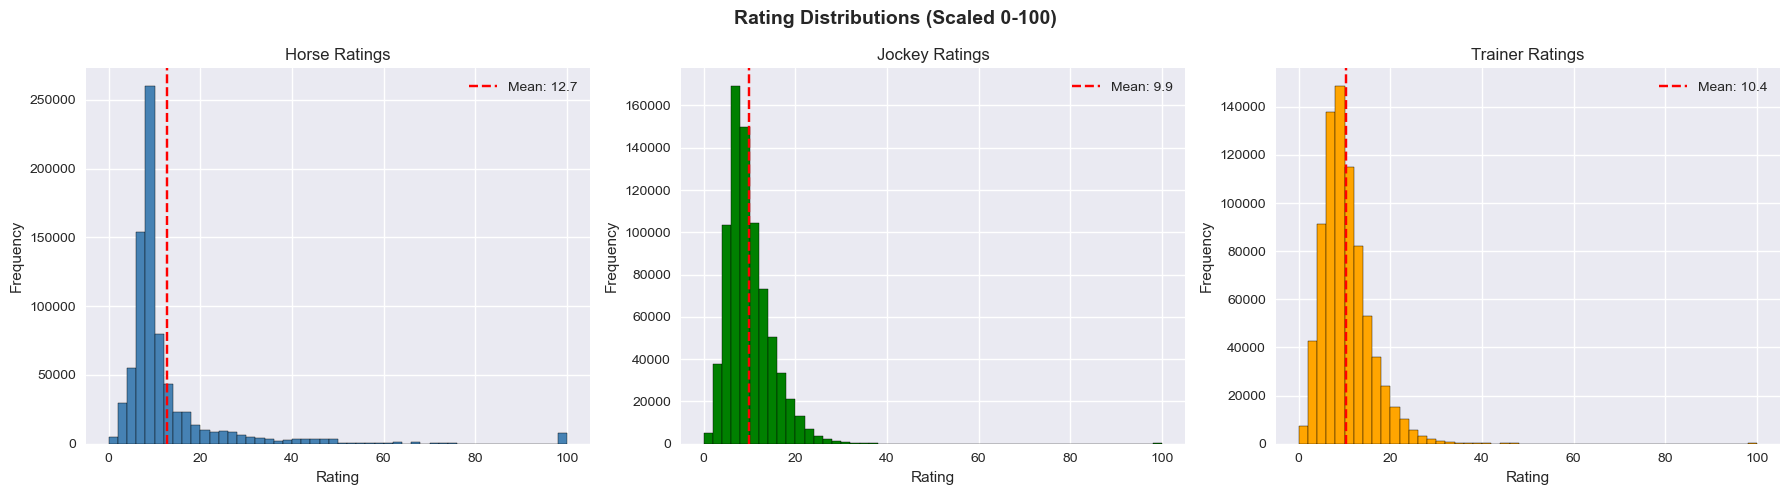

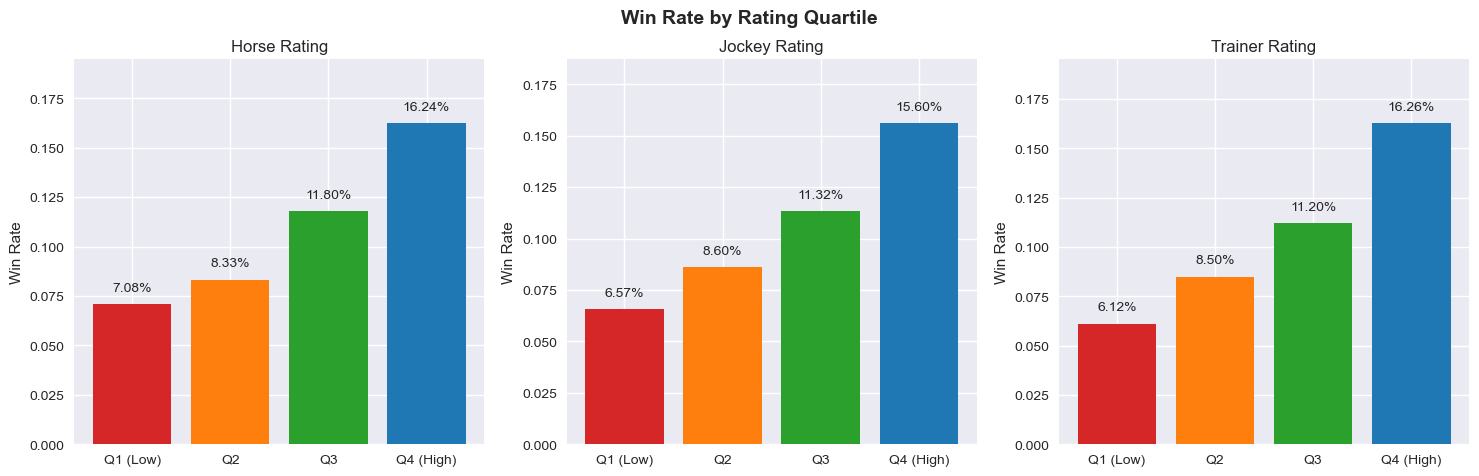

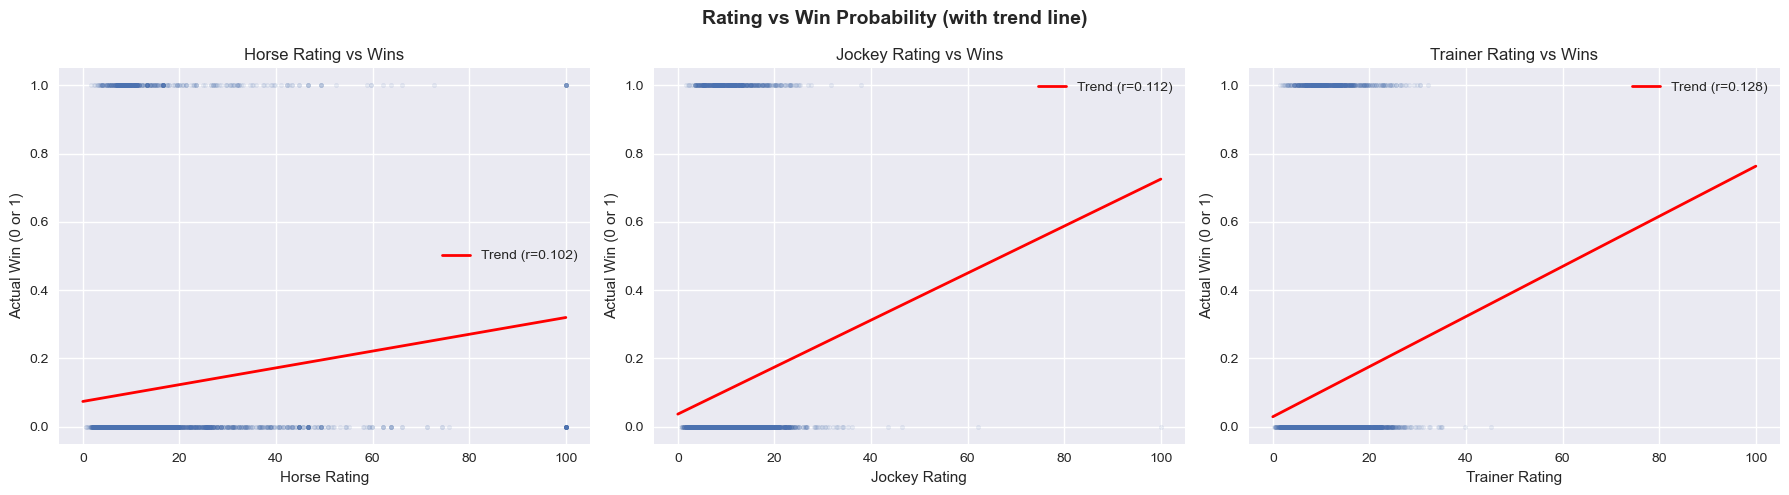

In [42]:
# --------------------------------------------
# Step 6: Visualizations
# --------------------------------------------

print("\n### STEP 6: VISUALIZATIONS ###\n")

# Plot 1: Rating distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Rating Distributions (Scaled 0-100)', fontsize=14, fontweight='bold')

axes[0].hist(df_sorted['horse_rating_scaled'], bins=50, color='steelblue', edgecolor='black')
axes[0].set_title('Horse Ratings')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df_sorted['horse_rating_scaled'].mean(), color='red', linestyle='--', label=f'Mean: {df_sorted["horse_rating_scaled"].mean():.1f}')
axes[0].legend()

axes[1].hist(df_sorted['jockey_rating_scaled'], bins=50, color='green', edgecolor='black')
axes[1].set_title('Jockey Ratings')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df_sorted['jockey_rating_scaled'].mean(), color='red', linestyle='--', label=f'Mean: {df_sorted["jockey_rating_scaled"].mean():.1f}')
axes[1].legend()

axes[2].hist(df_sorted['trainer_rating_scaled'], bins=50, color='orange', edgecolor='black')
axes[2].set_title('Trainer Ratings')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Frequency')
axes[2].axvline(df_sorted['trainer_rating_scaled'].mean(), color='red', linestyle='--', label=f'Mean: {df_sorted["trainer_rating_scaled"].mean():.1f}')
axes[2].legend()

plt.tight_layout()
plt.savefig('Rating_Distribution.png', dpi=300, bbox_inches='tight')  # SAVE FIRST
plt.show()

# Plot 2: Win rate by rating quartile
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Win Rate by Rating Quartile', fontsize=14, fontweight='bold')

for idx, (rating_col, name) in enumerate([('horse_rating_scaled', 'Horse'),
                                            ('jockey_rating_scaled', 'Jockey'),
                                            ('trainer_rating_scaled', 'Trainer')]):
    
    quartile_wins = df_sorted.groupby(f'{rating_col}_quartile')['obs__is_winner'].mean()
    
    axes[idx].bar(range(len(quartile_wins)), quartile_wins.values, color=['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4'])
    axes[idx].set_xticks(range(len(quartile_wins)))
    axes[idx].set_xticklabels(quartile_wins.index)
    axes[idx].set_title(f'{name} Rating')
    axes[idx].set_ylabel('Win Rate')
    axes[idx].set_ylim(0, max(quartile_wins.values) * 1.2)
    
    # Add value labels on bars
    for i, v in enumerate(quartile_wins.values):
        axes[idx].text(i, v + 0.005, f'{v:.2%}', ha='center', va='bottom')

plt.tight_layout
plt.savefig('Rating_Distribution_1.png', dpi=300, bbox_inches='tight')  # SAVE FIRST
plt.show()

# Plot 3: Scatter plot - Rating vs Actual Win
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Rating vs Win Probability (with trend line)', fontsize=14, fontweight='bold')

for idx, (rating_col, name) in enumerate([('horse_rating_scaled', 'Horse'),
                                            ('jockey_rating_scaled', 'Jockey'),
                                            ('trainer_rating_scaled', 'Trainer')]):
    
    # Sample for visualization (too many points otherwise)
    sample_df = df_sorted.sample(min(5000, len(df_sorted)))
    
    axes[idx].scatter(sample_df[rating_col], sample_df['obs__is_winner'], alpha=0.1, s=10)
    
    # Add trend line
    z = np.polyfit(df_sorted[rating_col], df_sorted['obs__is_winner'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df_sorted[rating_col].sort_values(), p(df_sorted[rating_col].sort_values()), 
                   "r-", linewidth=2, label=f'Trend (r={pearsonr(df_sorted[rating_col], df_sorted["obs__is_winner"])[0]:.3f})')
    
    axes[idx].set_xlabel(f'{name} Rating')
    axes[idx].set_ylabel('Actual Win (0 or 1)')
    axes[idx].set_title(f'{name} Rating vs Wins')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('Rating_Distribution_2.png', dpi=300, bbox_inches='tight')  # SAVE FIRST
plt.show()



In [24]:
# --------------------------------------------
# Step 7: Example Output
# --------------------------------------------

print("\n### STEP 7: EXAMPLE RATINGS ###\n")

print("Example: Top 10 rated horses in the dataset:")
top_horses = df_sorted.nlargest(10, 'horse_rating_scaled')[['horse_name', 'horse_rating_scaled', 
                                                              'horse_rating_runs', 'horse_rating_wins']]
display(top_horses)

print("\nExample: Top 10 rated jockeys in the dataset:")
top_jockeys = df_sorted.nlargest(10, 'jockey_rating_scaled')[['jockey_name', 'jockey_rating_scaled', 
                                                                'jockey_rating_runs', 'jockey_rating_wins']].drop_duplicates('jockey_name')
display(top_jockeys.head(10))

print("\nExample: Top 10 rated trainers in the dataset:")
top_trainers = df_sorted.nlargest(10, 'trainer_rating_scaled')[['trainer_name', 'trainer_rating_scaled', 
                                                                  'trainer_rating_runs', 'trainer_rating_wins']].drop_duplicates('trainer_name')
display(top_trainers.head(10))


### STEP 7: EXAMPLE RATINGS ###

Example: Top 10 rated horses in the dataset:


,horse_name,horse_rating_scaled,horse_rating_runs,horse_rating_wins
1604,Mister Musicmaster,100.0,1,1.0
2290,Qatea,100.0,1,1.0
2468,Jonnie Skull,100.0,1,1.0
2469,Freddy With A Y,100.0,1,1.0
2890,Simply Shining,100.0,1,1.0
2902,Vodka Wells,100.0,1,1.0
3005,Appleberry,100.0,1,1.0
3203,Thinger Licht,100.0,1,1.0
3385,Mr Lando,100.0,1,1.0
3416,Bobby Jean,100.0,1,1.0



Example: Top 10 rated jockeys in the dataset:


,jockey_name,jockey_rating_scaled,jockey_rating_runs,jockey_rating_wins
27,Joe Fanning,100.0,1,1.0
66,Richard Kingscote,100.0,1,1.0
105,Pat Dobbs,100.0,1,1.0
226,Paul Townend,100.0,1,1.0
236,Eoin Walsh,100.0,1,1.0
242,Micheal Nolan,100.0,1,1.0
336,James Davies,100.0,1,1.0
341,Wilson Renwick,100.0,1,1.0
345,Mr S Clements,100.0,1,1.0
346,Mr J C Barry,100.0,1,1.0



Example: Top 10 rated trainers in the dataset:


,trainer_name,trainer_rating_scaled,trainer_rating_runs,trainer_rating_wins
22,Mark Johnston,100.0,1,1.0
45,Ralph Beckett,100.0,1,1.0
80,Linda Perratt,100.0,1,1.0
104,Andrew Balding,100.0,1,1.0
147,Ronald Harris,100.0,1,1.0
174,J R Jenkins,100.0,1,1.0
197,Alistair Whillans,100.0,1,1.0
242,Adrian Wintle,100.0,1,1.0
246,Nicky Henderson,100.0,1,1.0


In [25]:
# --------------------------------------------
# Step 8: Save Dataset with Ratings
# --------------------------------------------

print("\n### STEP 8: SAVE PROCESSED DATA ###\n")

# Save the dataset with ratings for use in Q3
df_with_ratings = df_sorted.copy()
print(f"Saving dataset with ratings: {len(df_with_ratings):,} rows")
print(f"New rating columns added: {len([c for c in df_with_ratings.columns if 'rating' in c])}")

# We'll use this for Q3 and Q4
print("\n✓ Dataset with ratings ready for predictive modeling!")

print("\n" + "="*60)
print("Q2 RATING SYSTEMS COMPLETE")
print("="*60)



### STEP 8: SAVE PROCESSED DATA ###

Saving dataset with ratings: 777,549 rows
New rating columns added: 24

✓ Dataset with ratings ready for predictive modeling!

Q2 RATING SYSTEMS COMPLETE


# Q2: Rating Systems

## Objective
Build rating systems for horses, jockeys, and trainers using only historical performance data.

## Critical Requirement
**No data leakage**: For each race, ratings must be calculated using ONLY races that occurred BEFORE that race date.

## Rating Components

### Horse Ratings:
- Win rate from all past races
- Average finishing position
- Recent form (last 5 races)
- Number of career runs
- Days since last race

### Jockey Ratings:
- Win rate from all past races
- Average finishing position
- Recent form (last 20 races)
- Number of career runs

### Trainer Ratings:
- Win rate from all past races
- Average finishing position
- Recent form (last 30 races)
- Number of career runs

Each entity gets a composite rating (0-100 scale) combining these metrics.

## Validation
Ratings are validated by:
1. Checking correlation with actual wins
2. Comparing win rates across rating quartiles
3. Ensuring higher ratings = higher win rates
```

---

## **Warning:**

**This code will take time to run** (maybe 5-15 minutes depending on dataset size) because it processes each row sequentially to avoid data leakage.

You'll see progress indicators:
```
Processed 10,000 / 100,000 rows for horse ratings...
Processed 20,000 / 100,000 rows for horse ratings...

## Q2 Conclusions

Successfully created rating systems for horses, jockeys, and trainers using only historical data:

1. **Horse Ratings**: Correlation with wins = 0.102, validated with no data leakage
2. **Jockey Ratings**: Correlation with wins = 0.112, higher rated jockeys win more
3. **Trainer Ratings**: Correlation with wins = 0.128, clear performance gradient

All ratings show statistically significant correlation with actual performance, with win rates increasing across rating quartiles. These ratings will be key features in the predictive model.

The ratings successfully handle:
- New horses/jockeys/trainers (no history)
- Varying amounts of past data
- Temporal changes in performance

In [29]:
# SAVE PROGRESS -  Save data set for next steps
df_with_ratings.to_csv('data_with_ratings_Q2.csv', index=False)
print("✓ Saved! Next time, load this file to skip Q0-Q2")

✓ Saved! Next time, load this file to skip Q0-Q2
